In [1]:
pip install fbprophet -U

Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached pysimdjson-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl.metadata (2.3 kB)
Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.0 MB/s eta 0:00:00m eta 0:00:

##### Dataset

In [4]:
# monthly-car-sales.csv
# Location: https://mitu.co.in/dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('monthly-car-sales.csv')

In [12]:
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [8]:
df.dtypes

Month    object
Sales     int64
dtype: object

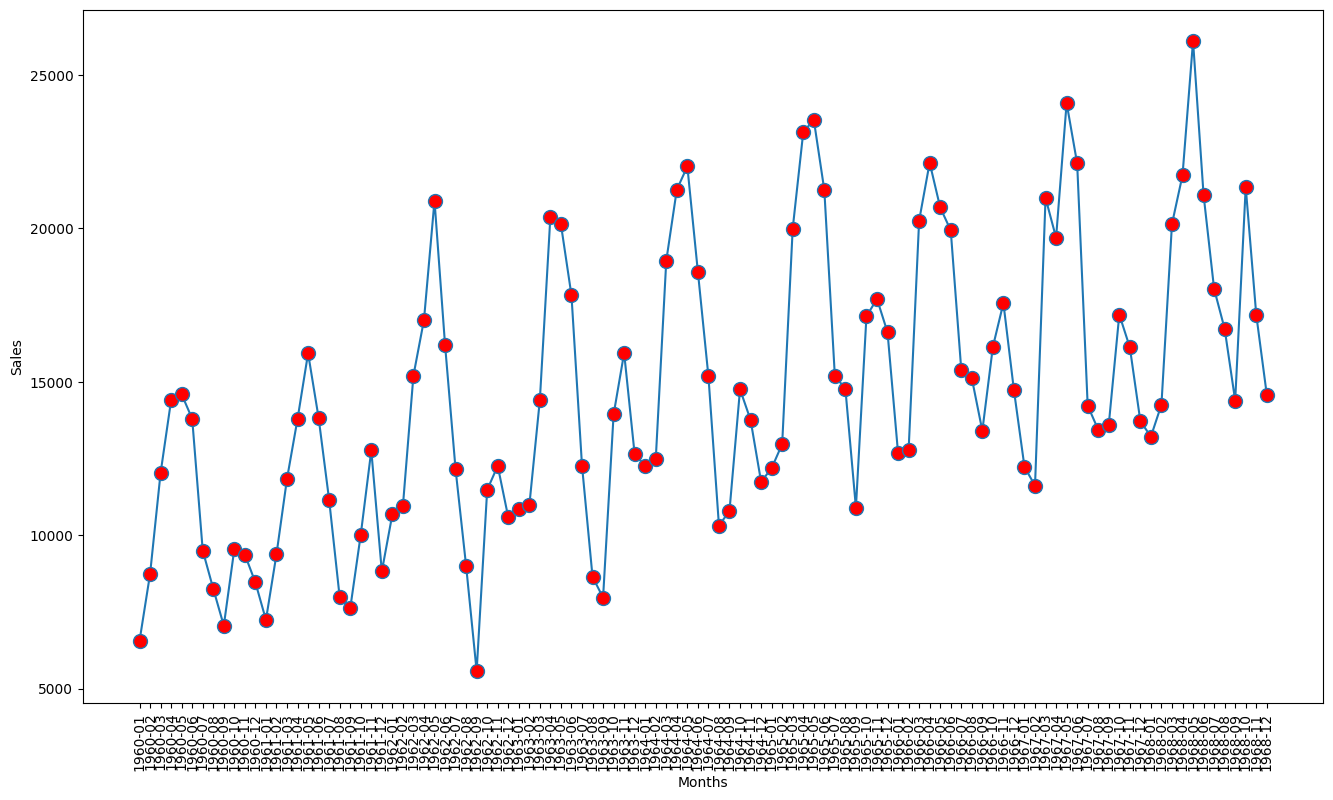

In [9]:
plt.figure(figsize=(16,9))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation='vertical')
plt.plot(df['Month'], df['Sales'], marker = 'o', mfc = 'r', ms=10)

In [13]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [15]:
df.columns = ['ds','y']

In [16]:
df.columns

Index(['ds', 'y'], dtype='object')

In [17]:
df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [18]:
# prepare expected column names
df['ds']= pd.to_datetime(df['ds'])

In [19]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [20]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [21]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [23]:
df.iloc[4,0]

Timestamp('1960-05-01 00:00:00')

In [24]:
import time

In [25]:
time.time()

1727758448.775008

In [26]:
time.time()

1727758526.2458072

In [27]:
time.asctime()

'Tue Oct  1 10:26:04 2024'

In [28]:
time.localtime()

time.struct_time(tm_year=2024, tm_mon=10, tm_mday=1, tm_hour=10, tm_min=26, tm_sec=20, tm_wday=1, tm_yday=275, tm_isdst=0)

##### Build the model

In [30]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [31]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)

In [32]:
model.fit(df)

10:29:56 - cmdstanpy - INFO - Chain [1] start processing
10:29:56 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])

for i in range(1, 13):
    date = '1970-%02d' % i
    future.append([date])

for i in range(1, 13):
    date = '1971-%02d' % i
    future.append([date])

In [34]:
future

[['1969-01'],
 ['1969-02'],
 ['1969-03'],
 ['1969-04'],
 ['1969-05'],
 ['1969-06'],
 ['1969-07'],
 ['1969-08'],
 ['1969-09'],
 ['1969-10'],
 ['1969-11'],
 ['1969-12'],
 ['1970-01'],
 ['1970-02'],
 ['1970-03'],
 ['1970-04'],
 ['1970-05'],
 ['1970-06'],
 ['1970-07'],
 ['1970-08'],
 ['1970-09'],
 ['1970-10'],
 ['1970-11'],
 ['1970-12'],
 ['1971-01'],
 ['1971-02'],
 ['1971-03'],
 ['1971-04'],
 ['1971-05'],
 ['1971-06'],
 ['1971-07'],
 ['1971-08'],
 ['1971-09'],
 ['1971-10'],
 ['1971-11'],
 ['1971-12']]

In [35]:
future = pd.DataFrame(future, columns=['ds'])

In [36]:
future

,ds
0,1969-01
1,1969-02
2,1969-03
3,1969-04
4,1969-05
5,1969-06
6,1969-07
7,1969-08
8,1969-09
9,1969-10


In [37]:
# predict on the future time
forecast = model.predict(future)

In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,16107.318303,14619.593911,17616.188405,16107.307933,16107.504240,-8.375151,-8.375151,-8.375151,2484.917109,...,296.397039,296.397039,296.397039,-2789.689298,-2789.689298,-2789.689298,0.0,0.0,0.0,16098.943152
1,1969-02-01,16166.374341,13360.915506,16475.757585,16165.234579,16167.794508,-1208.370955,-1208.370955,-1208.370955,2484.917109,...,-897.810967,-897.810967,-897.810967,-2795.477096,-2795.477096,-2795.477096,0.0,0.0,0.0,14958.003386
2,1969-03-01,16219.715278,18938.090264,22030.758483,16216.489367,16222.912205,4199.686993,4199.686993,4199.686993,2484.917109,...,-897.810967,-897.810967,-897.810967,2612.580852,2612.580852,2612.580852,0.0,0.0,0.0,20419.402272
3,1969-04-01,16278.771316,22542.502055,25594.969662,16273.030959,16284.468107,7817.877892,7817.877892,7817.877892,2484.917109,...,447.964727,447.964727,447.964727,4884.996057,4884.996057,4884.996057,0.0,0.0,0.0,24096.649209
4,1969-05-01,16335.922321,23859.069640,26982.738576,16327.778248,16344.667681,9081.895187,9081.895187,9081.895187,2484.917109,...,264.051935,264.051935,264.051935,6332.926143,6332.926143,6332.926143,0.0,0.0,0.0,25417.817508
5,1969-06-01,16394.978359,20258.116452,23410.562378,16384.254977,16406.443816,5425.694281,5425.694281,5425.694281,2484.917109,...,-497.106274,-497.106274,-497.106274,3437.883446,3437.883446,3437.883446,0.0,0.0,0.0,21820.672640
6,1969-07-01,16452.129364,16995.610902,20074.514817,16438.517316,16466.921180,2081.604266,2081.604266,2081.604266,2484.917109,...,447.964727,447.964727,447.964727,-851.277569,-851.277569,-851.277569,0.0,0.0,0.0,18533.733630
7,1969-08-01,16511.185402,14245.447191,17253.284830,16493.204072,16528.765415,-792.476034,-792.476034,-792.476034,2484.917109,...,-56.785647,-56.785647,-56.785647,-3220.607496,-3220.607496,-3220.607496,0.0,0.0,0.0,15718.709368
8,1969-09-01,16570.241440,13304.599212,16379.550092,16548.405818,16591.353601,-1727.413045,-1727.413045,-1727.413045,2484.917109,...,443.289188,443.289188,443.289188,-4655.619341,-4655.619341,-4655.619341,0.0,0.0,0.0,14842.828395
9,1969-10-01,16627.392444,17849.421443,20826.895883,16601.756861,16652.268702,2610.780740,2610.780740,2610.780740,2484.917109,...,296.397039,296.397039,296.397039,-170.533408,-170.533408,-170.533408,0.0,0.0,0.0,19238.173184


In [39]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [40]:
# summarize the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,16098.943152,14619.593911,17616.188405
1,1969-02-01,14958.003386,13360.915506,16475.757585
2,1969-03-01,20419.402272,18938.090264,22030.758483
3,1969-04-01,24096.649209,22542.502055,25594.969662
4,1969-05-01,25417.817508,23859.069640,26982.738576
5,1969-06-01,21820.672640,20258.116452,23410.562378
6,1969-07-01,18533.733630,16995.610902,20074.514817
7,1969-08-01,15718.709368,14245.447191,17253.284830
8,1969-09-01,14842.828395,13304.599212,16379.550092
9,1969-10-01,19238.173184,17849.421443,20826.895883


/home/mitu/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mitu/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


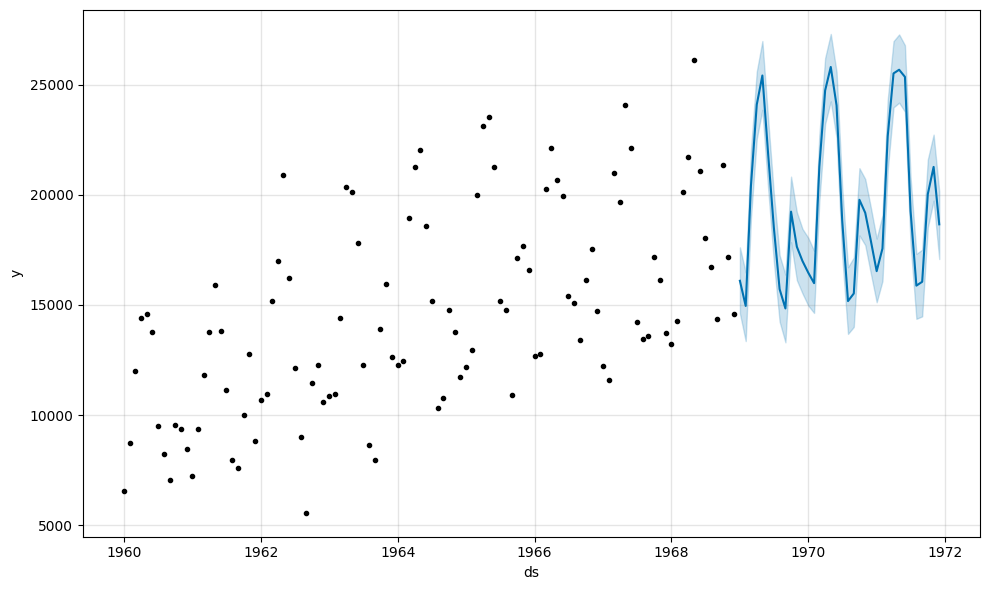

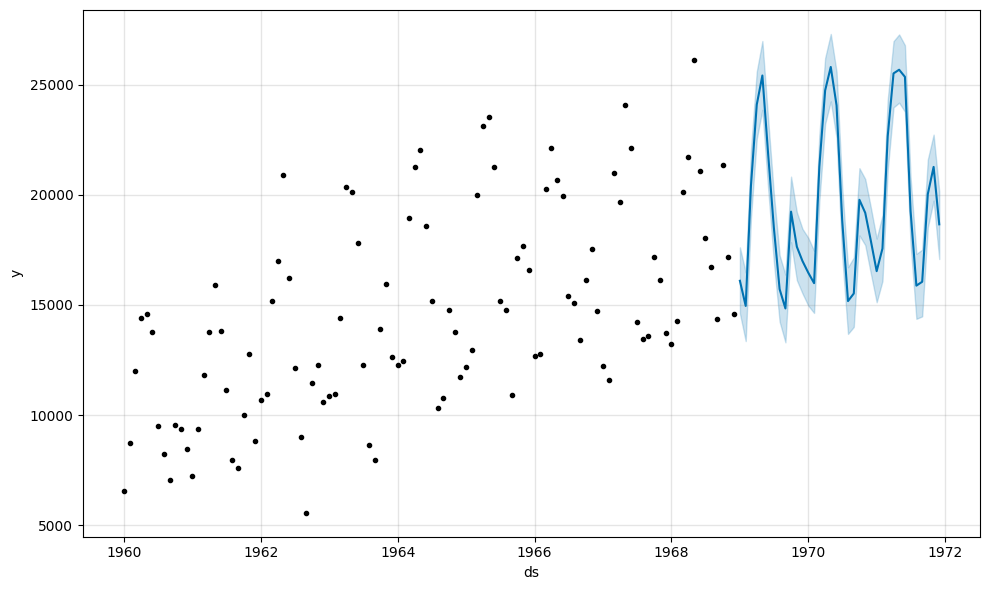

In [41]:
model.plot(forecast)

In [42]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [44]:
new = forecast[['ds','yhat']]

In [45]:
new

,ds,yhat
0,1969-01-01,16098.943152
1,1969-02-01,14958.003386
2,1969-03-01,20419.402272
3,1969-04-01,24096.649209
4,1969-05-01,25417.817508
5,1969-06-01,21820.672640
6,1969-07-01,18533.733630
7,1969-08-01,15718.709368
8,1969-09-01,14842.828395
9,1969-10-01,19238.173184


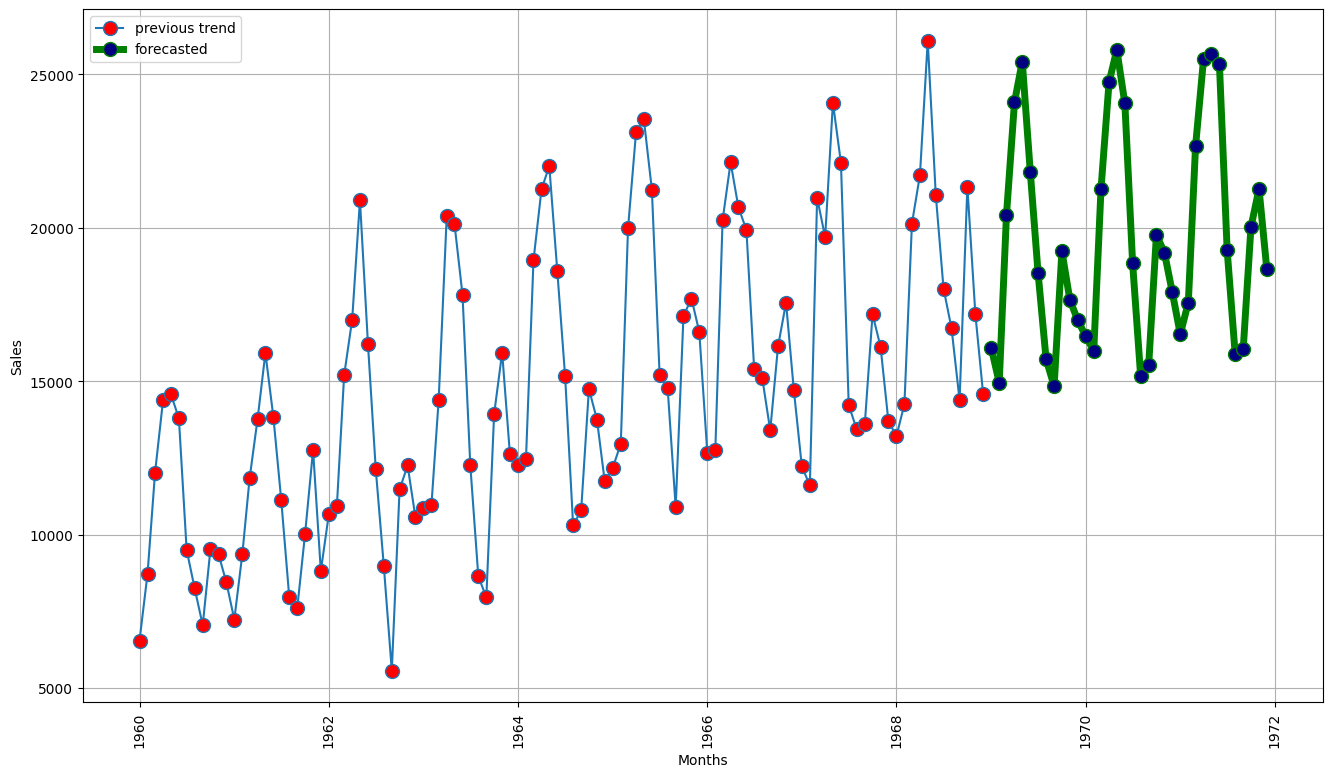

In [55]:
plt.figure(figsize=(16,9))
plt.grid()
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation='vertical')
plt.plot(df['ds'], df['y'], marker = 'o', mfc = 'r', ms=10, label = 'previous trend')
plt.plot(new['ds'], new['yhat'], label = 'forecasted', 
         marker='o', color='g', mfc='navy', ms=10, lw=5)
plt.legend()

In [56]:
# sealevel.csv